For my capstone project on dynamic pricing for Airbnb properties, first, explore for the Data Acquisition phase:
find Airbnb Booking Simulator Datasets on Kaggle
https://www.kaggle.com/datasets/rupindersinghrana/airbnb-price-dataset/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/Airbnb_Data.csv")  
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


First I would like to group all the data by city and see how many entities are there for each city then decide to maybe keep only the data for a specific city(cities)

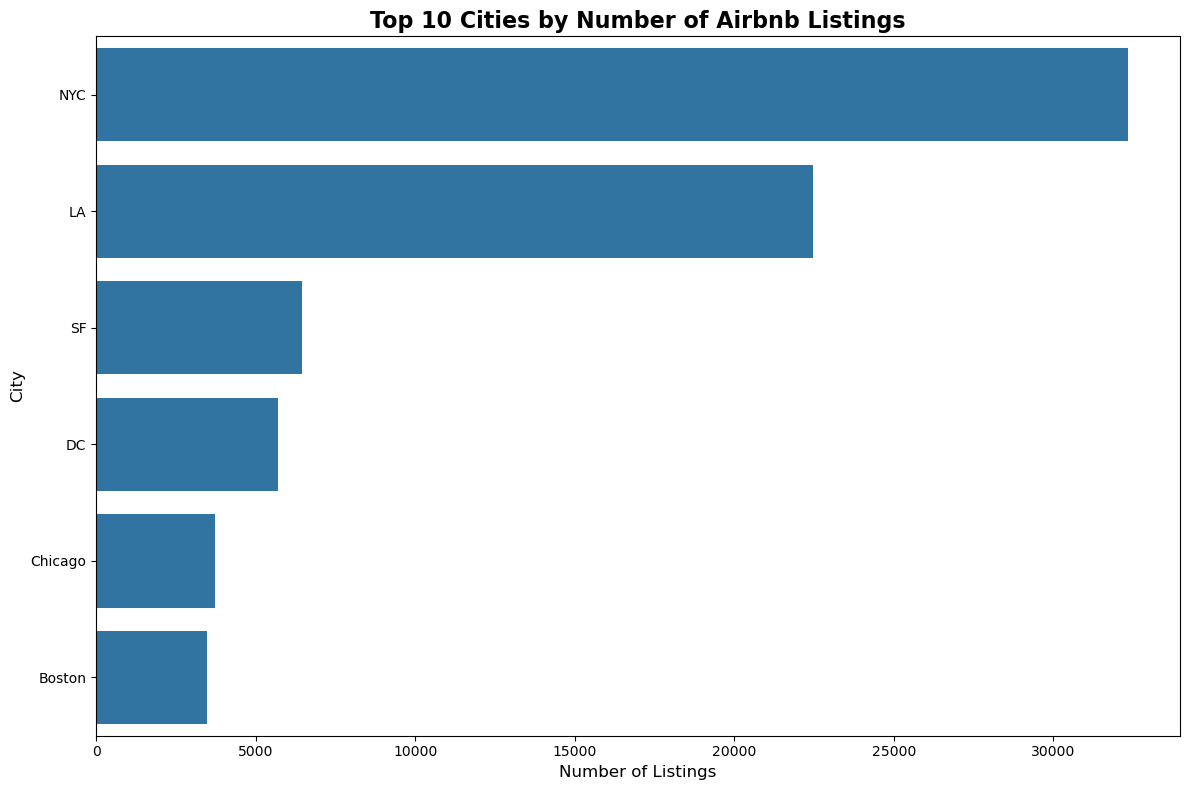

      city  listing_count
0      NYC          32349
1       LA          22453
2       SF           6434
3       DC           5688
4  Chicago           3719
5   Boston           3468


In [ ]:
city_counts = df['city'].value_counts()

plt.figure(figsize=(12, 8))
top_10_cities = city_counts.head(10)
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.title('Top 10 Cities by Number of Airbnb Listings', fontsize=16, fontweight='bold')
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.savefig('image/city_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

city_counts = city_counts.reset_index()
city_counts.columns = ['city', 'listing_count']

print(city_counts.head(10))


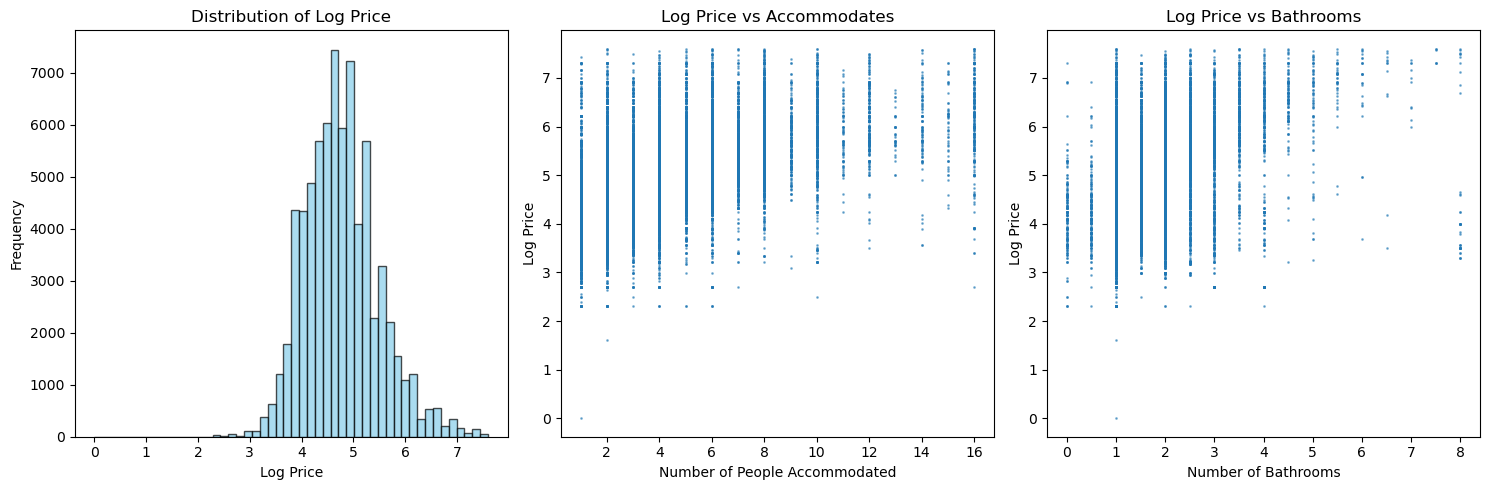

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['log_price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.scatter(df['accommodates'], df['log_price'], alpha=0.5, s=1)
plt.title('Log Price vs Accommodates')
plt.xlabel('Number of People Accommodated')
plt.ylabel('Log Price')

plt.subplot(1, 3, 3)
plt.scatter(df['bathrooms'], df['log_price'], alpha=0.5, s=1)
plt.title('Log Price vs Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log Price')

plt.tight_layout()
plt.savefig('image/log_price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

i wanna remove all other cities but keeping only the NYC and LA

In [9]:
df_filtered_by_city = df[df['city'].isin(['NYC', 'LA'])].copy()
# Confirm the result
print(df_filtered_by_city['city'].value_counts())

df_filtered_by_city.shape

city
NYC    32349
LA     22453
Name: count, dtype: int64


(54802, 29)

In [ ]:
# basic cleaning
# Remove exact duplicate rows
df_filtered_by_city_cleaned = df_filtered_by_city.drop_duplicates()
df_filtered_by_city_cleaned.shape


bathrooms                   165
first_review              11910
host_has_profile_pic        185
host_identity_verified      185
host_response_rate        14003
host_since                  185
last_review               11873
neighbourhood              5414
review_scores_rating      12588
thumbnail_url              5814
zipcode                     741
bedrooms                     74
beds                        107
dtype: int64


In [22]:
#remove unwanted columns
columns_to_drop = [
    "bed_type", "cancellation_policy", "description", "first_review",
    "host_has_profile_pic", "host_identity_verified", "host_response_rate",
    "last_review", "number_of_reviews", "thumbnail_url", "cleaning_fee", "neighbourhood", "latitude", "longitude", "name"
]

df_filtered = df_filtered_by_city_cleaned.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])

df_filtered.shape

(54802, 19)

In [28]:
columns_to_drop = [
     "cleaning_fee", "neighbourhood", "latitude", "longitude", "name", "review_scores_rating", "host_since"
]
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])
df_filtered.shape

(54802, 12)

In [30]:
# View how many missing values per column
missing_summary = df_filtered.isnull().sum()
print(missing_summary[missing_summary > 0])
df_filtered = df_filtered.dropna()
df_filtered.shape


bathrooms    165
zipcode      741
bedrooms      74
beds         107
dtype: int64


(53791, 12)

In [32]:
df_filtered.to_csv("data/airbnb_nyc_la_cleaned.csv", index=False)


=======================================

Exploratory Data Analysis (EDA) on the dataset

In [42]:
df = pd.read_csv("data/airbnb_nyc_la_cleaned.csv")  
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53791 entries, 0 to 53790
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53791 non-null  int64  
 1   log_price         53791 non-null  float64
 2   property_type     53791 non-null  object 
 3   room_type         53791 non-null  object 
 4   amenities         53791 non-null  object 
 5   accommodates      53791 non-null  int64  
 6   bathrooms         53791 non-null  float64
 7   city              53791 non-null  object 
 8   instant_bookable  53791 non-null  object 
 9   zipcode           53791 non-null  object 
 10  bedrooms          53791 non-null  float64
 11  beds              53791 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 4.9+ MB


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,city,instant_bookable,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,NYC,f,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,NYC,t,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,NYC,t,10027,1.0,3.0
3,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,LA,t,90292,1.0,1.0
4,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,LA,f,90015,1.0,1.0


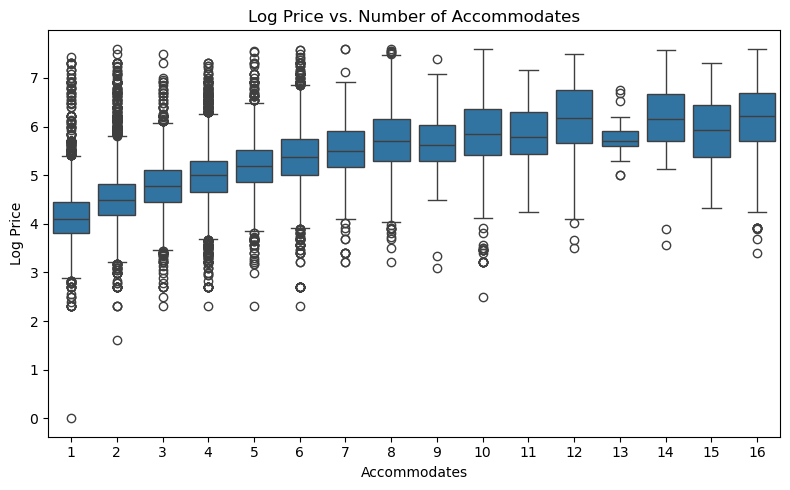

In [43]:
#price_vs_accommodates
plt.figure(figsize=(8, 5))
sns.boxplot(x='accommodates', y='log_price', data=df)

plt.title("Log Price vs. Number of Accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Log Price")

plt.tight_layout()
plt.savefig("image/price_vs_accommodates.png")  
plt.show()

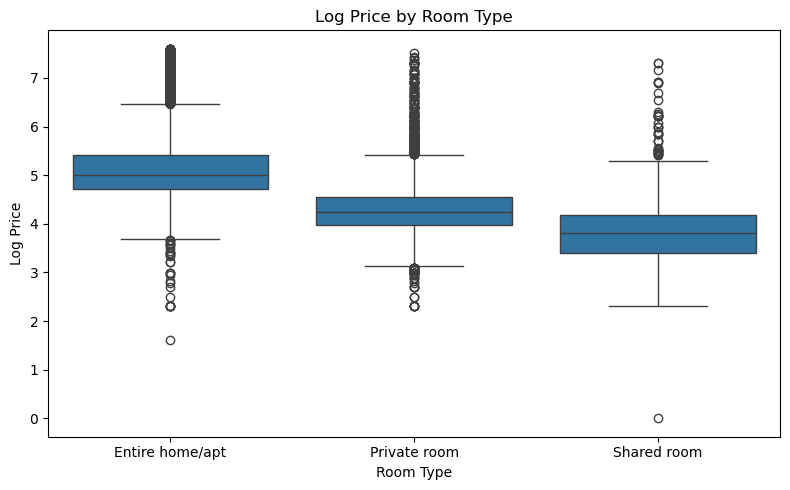

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='log_price', data=df)

plt.title("Log Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Log Price")

plt.tight_layout()
plt.savefig("image/price_by_room_type.png")  
plt.show()

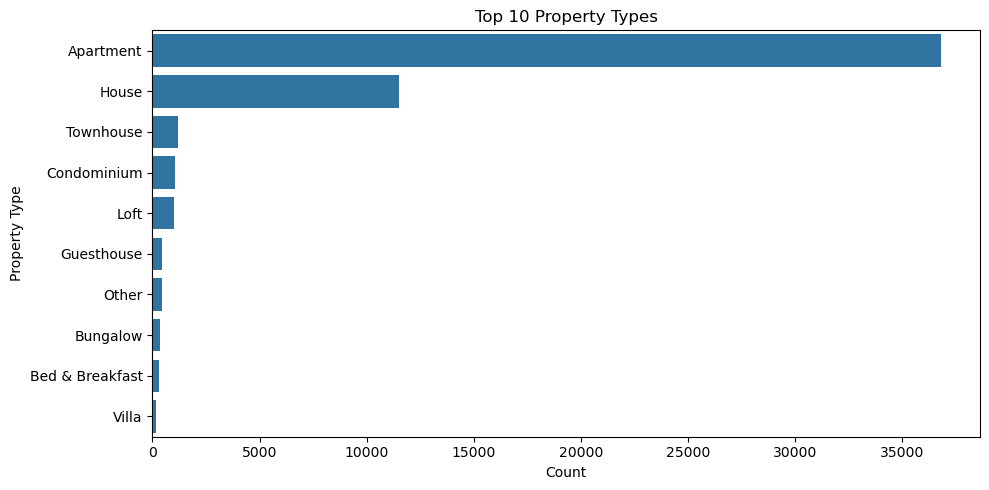

In [ ]:
plt.figure(figsize=(10, 5))

top_property_types = df['property_type'].value_counts().nlargest(10).index
sns.countplot(y='property_type', data=df, order=top_property_types)

plt.title("Top 10 Property Types")
plt.xlabel("Count")
plt.ylabel("Property Type")

plt.tight_layout()
plt.savefig("image/property_type_count.png")  
plt.show()

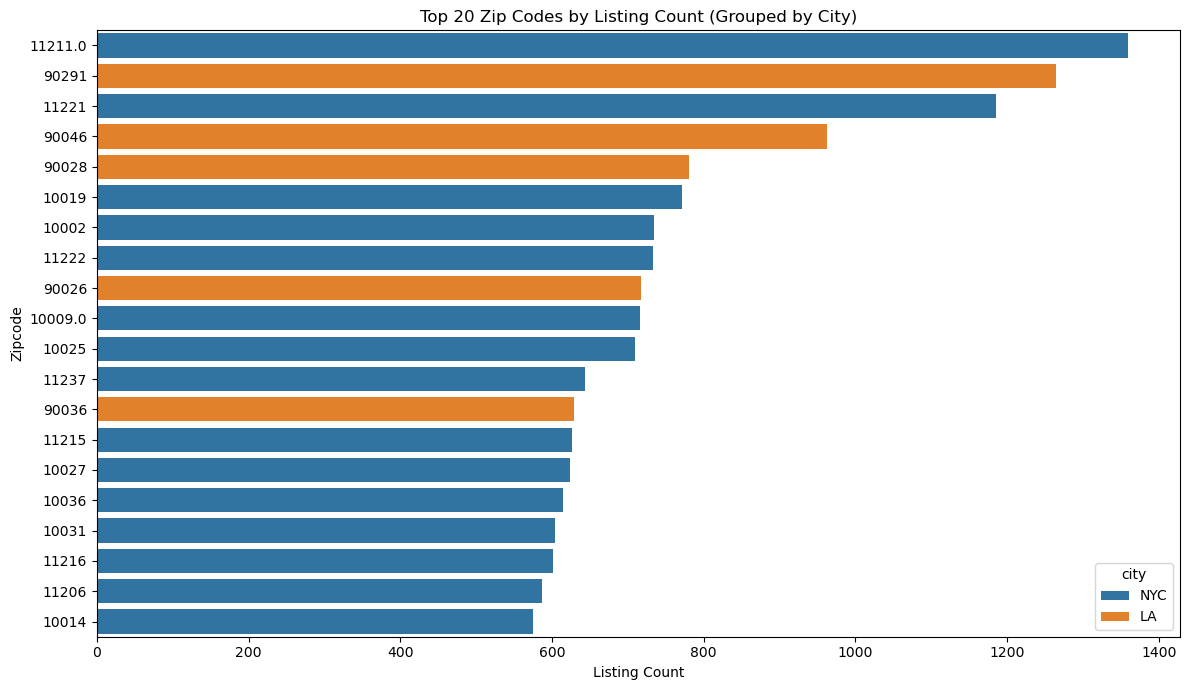

In [47]:
zipcode_counts = df.groupby(['city', 'zipcode']).size().reset_index(name='listing_count')

top_20_zipcodes = zipcode_counts.sort_values(by='listing_count', ascending=False).head(20)
plt.figure(figsize=(12, 7))
sns.barplot(data=top_20_zipcodes, x='listing_count', y='zipcode', hue='city')

plt.title("Top 20 Zip Codes by Listing Count (Grouped by City)")
plt.xlabel("Listing Count")
plt.ylabel("Zipcode")
plt.tight_layout()

# Save and show
plt.savefig("image/top_20_zipcodes_by_city.png")
plt.show()

====== Break down amenities 
the amenities column is a list of items such as {TV, hot tub, "Wireless Internet","Air conditioning"}
I want to break down this column into individual amenities 
1. if a amenity appears in  >95% of properties, then this can be removed, indicating this is standard for most properties. 
2. find correlation between each amenity to the log-price and determine which amenity play a more important role in affecting pricing

In [53]:
import re

# Parse amenities into a list of clean strings
def parse_amenities(raw):
    if not isinstance(raw, str):
        return []
    # Remove the curly braces and split by comma, handling quoted values
    raw = raw.strip('{}')
    # Split by comma not inside quotes
    items = re.findall(r'"(.*?)"|(\w[\w\s\-/]+)', raw)
    amenities = [a[0] if a[0] else a[1] for a in items]
    return [a.strip() for a in amenities if a]

In [54]:
# Step 1: Clean and Parse amenities Column
import ast
df = pd.read_csv("data/airbnb_nyc_la_cleaned.csv")  
df['amenities_parsed'] = df['amenities'].apply(parse_amenities)

# df.info()
df.head(10)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,city,instant_bookable,zipcode,bedrooms,beds,amenities_parsed
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,NYC,f,11201,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,..."
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,NYC,t,10019,3.0,3.0,"[Wireless Internet, Air conditioning, Kitchen,..."
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,NYC,t,10027,1.0,3.0,"[TV, Cable TV, Wireless Internet, Air conditio..."
3,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,LA,t,90292,1.0,1.0,"[TV, Internet, Wireless Internet, Air conditio..."
4,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,LA,f,90015,1.0,1.0,"[TV, Cable TV, Wireless Internet, Wheelchair a..."
5,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,LA,t,91748,1.0,1.0,"[Wireless Internet, Air conditioning, Kitchen,..."
6,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,NYC,f,10009.0,1.0,1.0,"[Internet, Wireless Internet, Air conditioning..."
7,17423675,5.010635,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.5,LA,f,90254,2.0,2.0,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
8,14066228,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",2,1.0,LA,f,90277,1.0,1.0,"[TV, Internet, Wireless Internet, Kitchen, Fre..."
9,583490,4.955827,Apartment,Entire home/apt,"{Kitchen,Heating,""Smoke detector"",""Carbon mono...",2,1.0,LA,f,90804,1.0,1.0,"[Kitchen, Heating, Smoke detector, Carbon mono..."


In [59]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 2: One-hot encode the amenities using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_df = pd.DataFrame(mlb.fit_transform(df['amenities_parsed']),
                            columns=mlb.classes_, index=df.index)

# Step 3: Remove Standard Amenities
# Remove amenities that appear in >95% (or even >90%) of listings — they don't help differentiate price.
prevalence = amenities_df.mean()
non_standard = prevalence[prevalence <= 0.95].index.tolist()
filtered_amenities_df = amenities_df[non_standard]

# Step 4: Remove Rare Amenities
# Drop those appearing in <3% of listings — they introduce sparsity and may hurt generalization.
sufficiently_present = prevalence[prevalence >= 0.03].index.tolist()
selected_amenities = list(set(non_standard) & set(sufficiently_present))
final_amenities_df = amenities_df[selected_amenities]

# Step 5: Rank Amenities by Correlation with Price
# Use Pearson correlation against log_price to see which amenities are strongly associated with higher or lower prices.
correlations = {
    amenity: df['log_price'].corr(amenities_df[amenity])
    for amenity in selected_amenities
}
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['log_price_correlation'])
correlation_df = correlation_df.sort_values(by='log_price_correlation', ascending=False)



correlation_df.head(10)
correlation_df.shape


(57, 1)

In [66]:
# Use Feature Importance from Model 
from sklearn.ensemble import RandomForestRegressor

X = pd.concat([df[['accommodates', 'bedrooms', 'bathrooms']], final_amenities_df], axis=1)
y = df['log_price']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = feature_importances.head(20)



In [ ]:
print(top_features)

bedrooms                                      0.302021
accommodates                                  0.113511
bathrooms                                     0.080296
Elevator                                      0.024164
Internet                                      0.015150
Shampoo                                       0.014628
Fire extinguisher                             0.014618
Family/kid friendly                           0.014560
Carbon monoxide detector                      0.014468
Buzzer/wireless intercom                      0.014303
Lock on bedroom door                          0.014286
Cable TV                                      0.013935
Laptop friendly workspace                     0.013930
Air conditioning                              0.013855
First aid kit                                 0.013516
TV                                            0.013347
Hair dryer                                    0.012989
Hangers                                       0.012673
Iron      

===== Baseline model

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [69]:
df = pd.read_csv("data/airbnb_cleaned_top20_amenities.csv")

target = 'log_price'

# Drop identifiers
df = df.drop(columns=['id'])

categorical_features = ['property_type', 'room_type', 'city', 'instant_bookable', 'zipcode']
numeric_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
binary_amenities = list(set(df.columns) - set([target] + categorical_features + numeric_features))
features = categorical_features + numeric_features + binary_amenities

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [70]:
# Preprocessing (One-hot encoding for categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric + binary features
)

# Baseline Model: Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Baseline Model: Random Forest")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

Baseline Model: Random Forest
MAE:  0.2900
RMSE: 0.3994
R²:   0.6666


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
